# Training a Deep Q-network to play Pong

## Training the network

The code for training the network is contained in the file train.py, with environment wrappers moved to wrappers.py and the definition of network structure and replay buffer in the file network.py.

The following cells can be executed to train a new network either using the basic DQN algorithm, the extension DDQN and/or including prioritized experience replay. Each completed training episode will be displayed as output, including training times and achieved reward. A test run in the end is also included.

Note, however, that this may take a long time depending on the available hardware! Executing them is not necessary to continue with the rest of the notebook.

**Basic DQN:**

In [ ]:
!python3 train.py

**DDQN:**

In [ ]:
!python3 train.py --ddqn

**DDQN with prioritized experience replay:**

In [ ]:
!python3 train.py --ddqn --prio_replay

## Displaying the results

I ran 10 training runs for each of the algorithms defined above, the results of which can be seen in the figure below that is also included in my report. The raw performance data of all test runs can be found in the folder test-results if necessary.

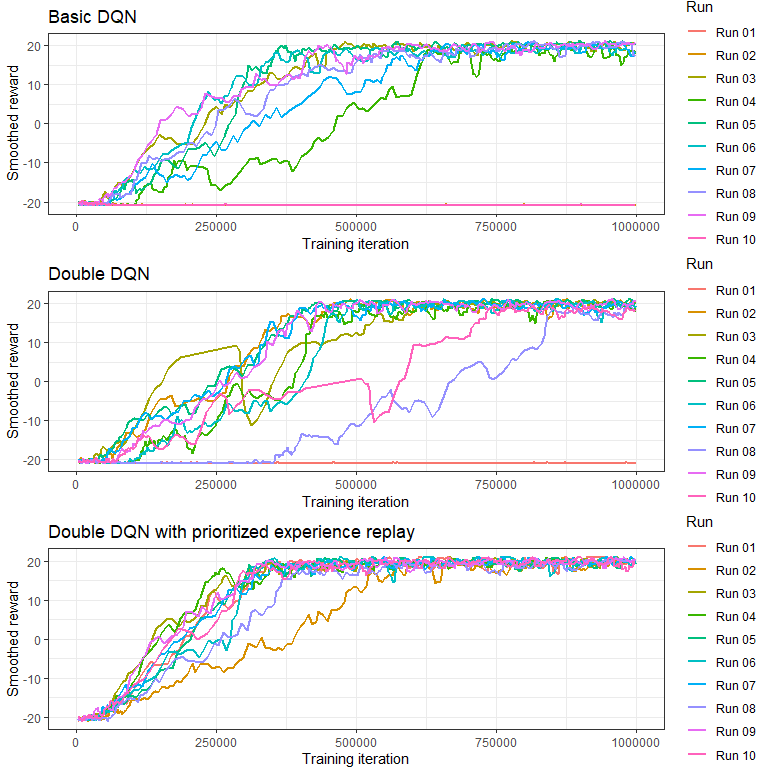

In [1]:
from IPython.display import Image
Image("../test-results/training-results.png")

## Watching the agent

A rather informing (and fun) way to understand the training procedure better is to observe the agent during play. In the following, I present the agent at three different steps of its training. To display a game, I define the following function:

In [ ]:
import torch
import gym
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from network import DQN_Conv, AVAILABLE_DEVICE
from wrappers import wrap_dqn_standard

def play_pong(policy_net_path = None):
    print("Create environment.")
    env = wrap_dqn_standard(gym.make("PongDeterministic-v4"))

    learning_rate = 0.0001
    input_channels = env.observation_space.shape[0]
    input_size = env.observation_space.shape[1]
    n_output = env.action_space.n

    policy_net = DQN_Conv(input_channels, input_size, n_output, learning_rate).to(AVAILABLE_DEVICE)
    if policy_net_path != None:
        print("Loading saved network from file")
        policy_net.load_state_dict(torch.load(policy_net_path, map_location=AVAILABLE_DEVICE))

    try:
        print("Playing an episode")
        s = env.reset()
        episode_it, episode_reward = 0, 0
        done = False
        while True:
            env.render()
            time.sleep(0.01)
            if policy_net_path == None:
                a = env.action_space.sample()
            else:
                with torch.no_grad():
                    s_tensor = s.reshape((1, input_channels, input_size, input_size))
                    s_tensor = torch.as_tensor(s_tensor, device = AVAILABLE_DEVICE)
                    a = policy_net.forward(s_tensor).argmax().item()
            s1, r, done, _ = env.step(a)
            episode_reward += r
            episode_it += 1
            s = s1
            if(done):
                print("Rewards: ", episode_reward)                
                print("Duration: ", episode_it)
                break
                
    except KeyboardInterrupt:
        print('Playing interrupted early.')    

    env.close()

### The untrained agent
In the beginning of training, the agent will execute randomly sampled actions. Unsurprisingly, this is not a very good strategy; but every once in a while it will score a point by chance. These successes allow the agent to learn.

In [ ]:
play_pong()

### Halfway trained
This agent corresponds to the first test run for DDQN with prioritized experience replay. After roughly 250,000 iterations, the agent performs slightly better than the hardcoded AI, achieving a narrow victory most of the time. The execution actually looks like a game of Pong.

In [ ]:
play_pong('example-agents/250000_policy-net.pt')

### Fully trained agent

After the full 1,000,000 iterations, the agent has converged to exactly one move he has perfected (note that different runs may produce different moves tat are all similarly effective). It will win the game with a perfect scoreline; however, it is questionable if it would still be able to beat a simulator with a higher degree of randomness.

In [ ]:
play_pong('example-agents/1000000_policy-net.pt')